In [1]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
import astropy.units as u

In [2]:
NGC_6819_kics = [5113441, 5024240, 5111718, 5112072, 5024143, 5024405, 5024312, 4937770, 5024414]

In [3]:
lcs = {}
qs = [2,3,4,5,7,8,9,11,12,13,15,16,17] # Need to leave out blank quarters i.e., 6, 10, ...
for idx, target in enumerate(NGC_6819_kics):
    print(idx, str(target))
    lc = search_lightcurvefile(target, quarter=1).download().PDCSAP_FLUX
    for q in qs:
        try:
            lc = lc.append(search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX)
        except:
            print(f'{target} : {q} did not work!')
    lcs[str(target)] = lc

0 5113441
1 5024240
2 5111718
3 5112072
4 5024143
5 5024405
6 5024312
7 4937770
8 5024414


In [4]:
corr_lcs = {}
for k,v in lcs.items():
    print(k,v)
    corr_lcs[k] = v.normalize().remove_nans().flatten(window_length=101).remove_outliers()

5113441 KeplerLightCurve(ID: 5113441)
5024240 KeplerLightCurve(ID: 5024240)
5111718 KeplerLightCurve(ID: 5111718)
5112072 KeplerLightCurve(ID: 5112072)
5024143 KeplerLightCurve(ID: 5024143)
5024405 KeplerLightCurve(ID: 5024405)
5024312 KeplerLightCurve(ID: 5024312)
4937770 KeplerLightCurve(ID: 4937770)
5024414 KeplerLightCurve(ID: 5024414)


/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


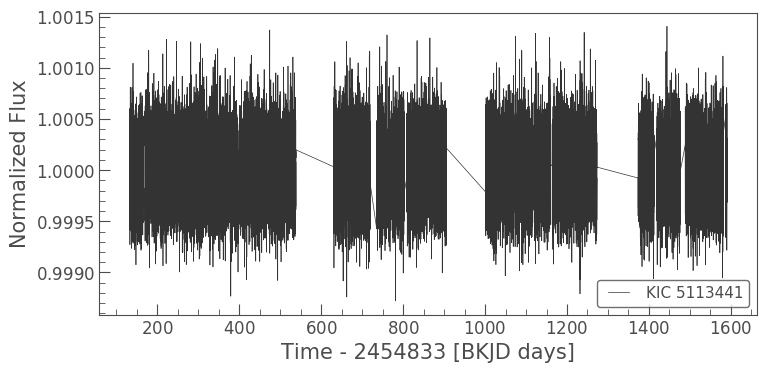

In [5]:
corr_lcs['5113441'].plot()

In [6]:
snr = {}
for k,v in corr_lcs.items():
    snr[k] = v.to_periodogram(freq_unit=u.microHertz, normalization='psd', 
                            maximum_frequency=288, minimum_frequency=1).flatten()

{'5113441': SNRPeriodogram(ID: 5113441), '5024240': SNRPeriodogram(ID: 5024240), '5111718': SNRPeriodogram(ID: 5111718), '5112072': SNRPeriodogram(ID: 5112072), '5024143': SNRPeriodogram(ID: 5024143), '5024405': SNRPeriodogram(ID: 5024405), '5024312': SNRPeriodogram(ID: 5024312), '4937770': SNRPeriodogram(ID: 4937770), '5024414': SNRPeriodogram(ID: 5024414)}


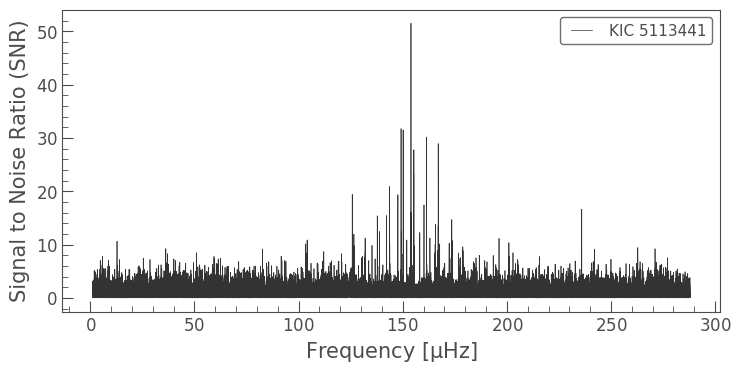

In [7]:
snr['5113441'].plot()
print(snr)

In [8]:
seismo = {}
for k,v in snr.items():
    seismo[k] = [v.estimate_numax(), v.estimate_dnu()]

(1, 20)

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


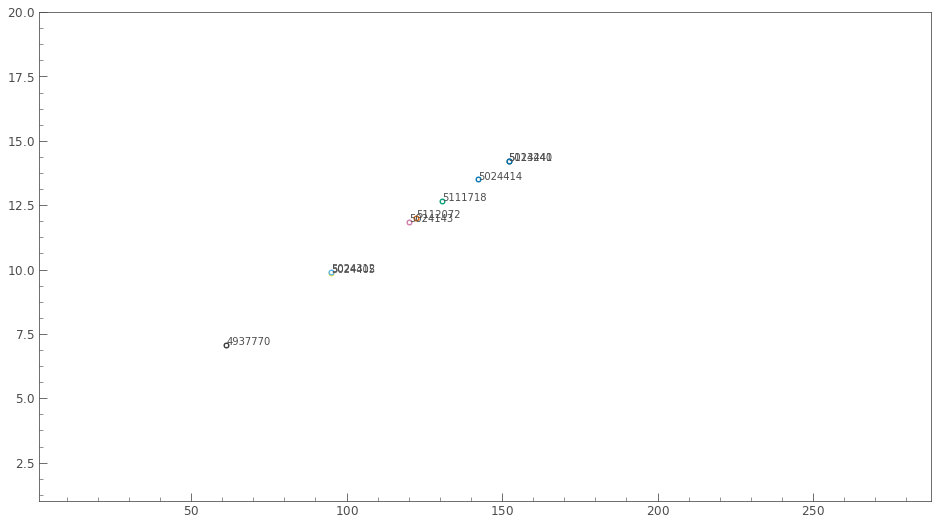

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[16,9])
for k, v in seismo.items():
    ax.scatter(v[0], v[1], label=k, s=25)
    ax.scatter(v[0], v[1], c='w', s=5)
    ax.text(v[0].value, v[1].value, str(k))
ax.set_xlim([1, 288])
ax.set_ylim([1, 20])

[<Quantity 142.2108478 uHz>, <Quantity 13.49827545 uHz>]


(<Quantity 13.49827545 uHz>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3609954208>)

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


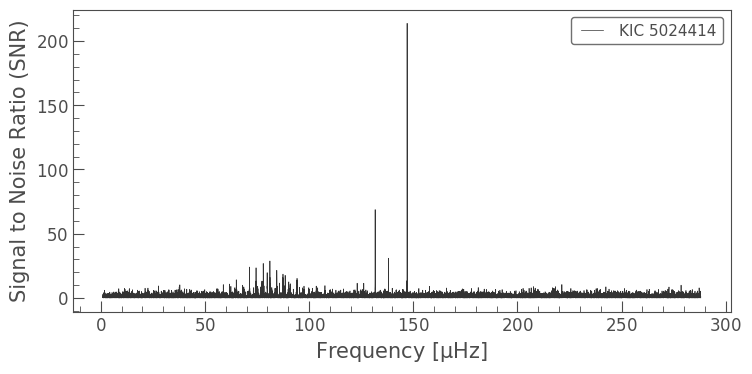

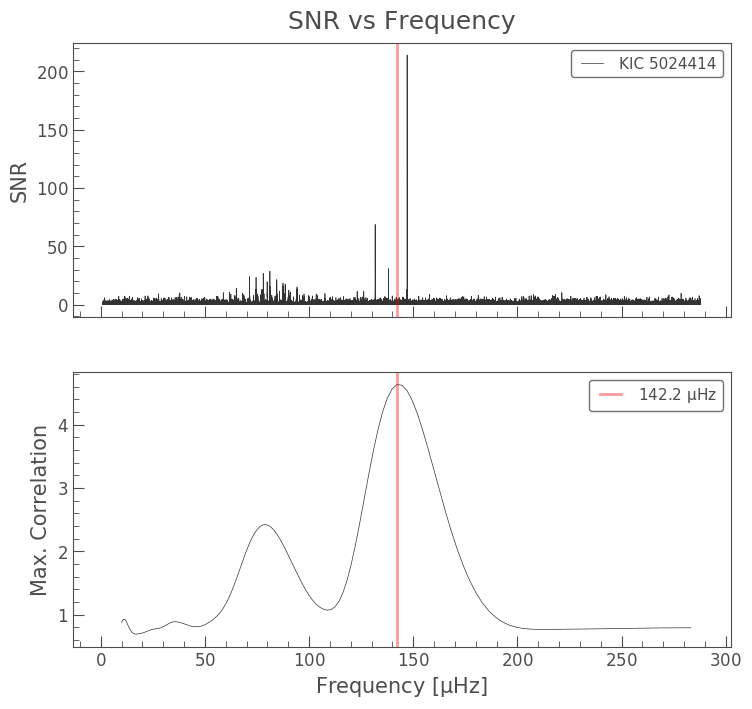

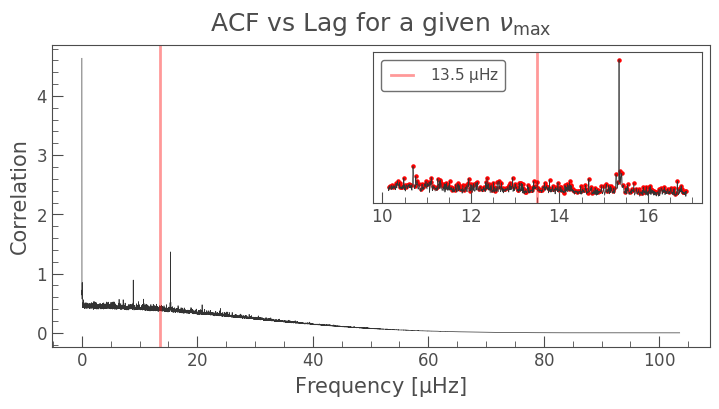

In [10]:
inspect = '5024414'
print(seismo[inspect])
snr[inspect].plot()
snr[inspect].estimate_numax(show_plots=True)
snr[inspect].estimate_dnu(show_plots=True)